# WALMART SALES ANALYSIS

### Setup:

#### Importing Libraries

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Loading Data


In [206]:
data = pd.read_csv(r"C:\Users\khaie\Desktop\DataAnalyticsProject\walmat_data_Walmart_Sales.csv")
print(data)


      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

### Data Preprocessing

#### Checking & fixing the columns name

In [207]:
# check & fix the columns name
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'month_name',
       'day', 'day_of_week'],
      dtype='object')

In [208]:
# Checking the null values in the dataset
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
month_name      0
day             0
day_of_week     0
dtype: int64

In [209]:
# Checking the null values in the dataset
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
month_name      0
day             0
day_of_week     0
dtype: int64

#### Data Type Conversations

In [217]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Display dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [211]:
df=pd.read_csv(r"C:\Users\khaie\Desktop\DataAnalyticsProject\walmat_data_Walmart_Sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Exploring the Data

In [212]:
print("max value", data['Weekly_Sales'].max())
print("min value", data['Weekly_Sales'].min())
print("highest allowed", data['Weekly_Sales'].mean() + 3*data['Weekly_Sales'].std())
print("lowest allowed", data['Weekly_Sales'].mean() - 3*data['Weekly_Sales'].std())

max value 3818686.45
min value 209986.25
highest allowed 2740064.743722864
lowest allowed -646134.9885993209


In [213]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


### Feature Engineering

In [214]:
new_data = data[(data['Weekly_Sales'] < 2740064.743722864) & (data['Weekly_Sales'] > -646134.9885993209)]

new_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


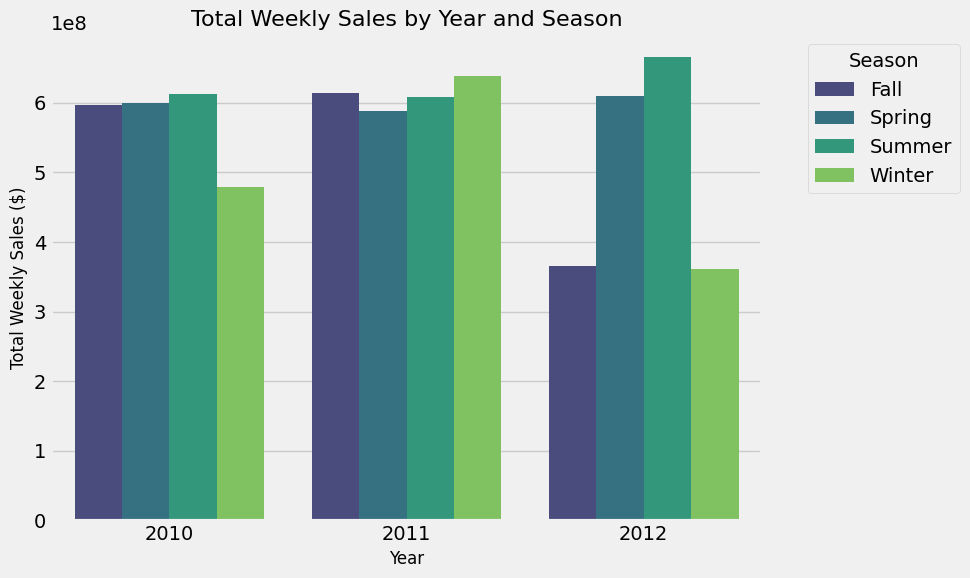

In [215]:
# Sort the data by 'Date' and assign it to 'data_sorted'
data_sorted = data.sort_values(by='Date')

# Ensure 'Date' column is in datetime format
data_sorted['Date'] = pd.to_datetime(data_sorted['Date'], format="%d-%m-%Y", dayfirst=True)

# Extract 'Year' from 'Date' column
data_sorted['Year'] = data_sorted['Date'].dt.year

# Define a function to determine the season
def get_season(date):
	month = date.month
	if month in [12, 1, 2]:
		return 'Winter'
	elif month in [3, 4, 5]:
		return 'Spring'
	elif month in [6, 7, 8]:
		return 'Summer'
	else:
		return 'Fall'

# Apply the function to create the 'Season' column
data_sorted['Season'] = data_sorted['Date'].apply(get_season)

# Group by 'Year' and 'Season' and calculate total weekly sales
seasonal_sales = data_sorted.groupby(['Year', 'Season'])['Weekly_Sales'].sum().reset_index()

# Sort the data by year and season to ensure proper plotting
seasonal_sales = seasonal_sales.sort_values(by=['Year', 'Season'])

# Plot the total weekly sales by season
plt.figure(figsize=(10, 6))

# Barplot to visualize total weekly sales by year and season
sns.barplot(x='Year', y='Weekly_Sales', hue='Season', data=seasonal_sales, palette='viridis')

# Add title and labels
plt.title('Total Weekly Sales by Year and Season', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Weekly Sales ($)', fontsize=12)

# Display the legend outside the plot
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [218]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", dayfirst=True)

# Extract year from the 'Date' column
df['year'] = df['Date'].dt.year

# Extract month from the 'Date' column
df['month'] = df['Date'].dt.month

# Extract month name from the 'Date' column
df['month_name'] = df['Date'].dt.month_name()

# Extract day from the 'Date' column
df['day'] = df['Date'].dt.day

# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) from the 'Date' column
df['day_of_week'] = df['Date'].dt.dayofweek

df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,month_name,day,day_of_week
5449,39,2010-05-21,1350673.98,0,76.67,2.826,209.392294,8.464,2010,5,May,21,4
4257,30,2012-03-16,413617.45,0,63.39,3.734,220.849847,7.057,2012,3,March,16,4
2431,18,2010-02-05,1205307.50,0,21.33,2.788,131.527903,9.202,2010,2,February,5,4
2146,16,2010-02-12,472044.28,1,20.87,2.572,189.464272,7.039,2010,2,February,12,4
976,7,2012-05-11,460397.41,0,48.54,3.870,197.548161,8.090,2012,5,May,11,4


# Exploratory Data Analysis (EDA)

##### Visualizing list of features
Most sales are on the lower side, with occasional spikes, showing that high sales are less common. Temperature and unemployment follow a stable pattern, with most values near the average. Fuel price and CPI have two peaks, suggesting shifts in the economy or consumer behavior.

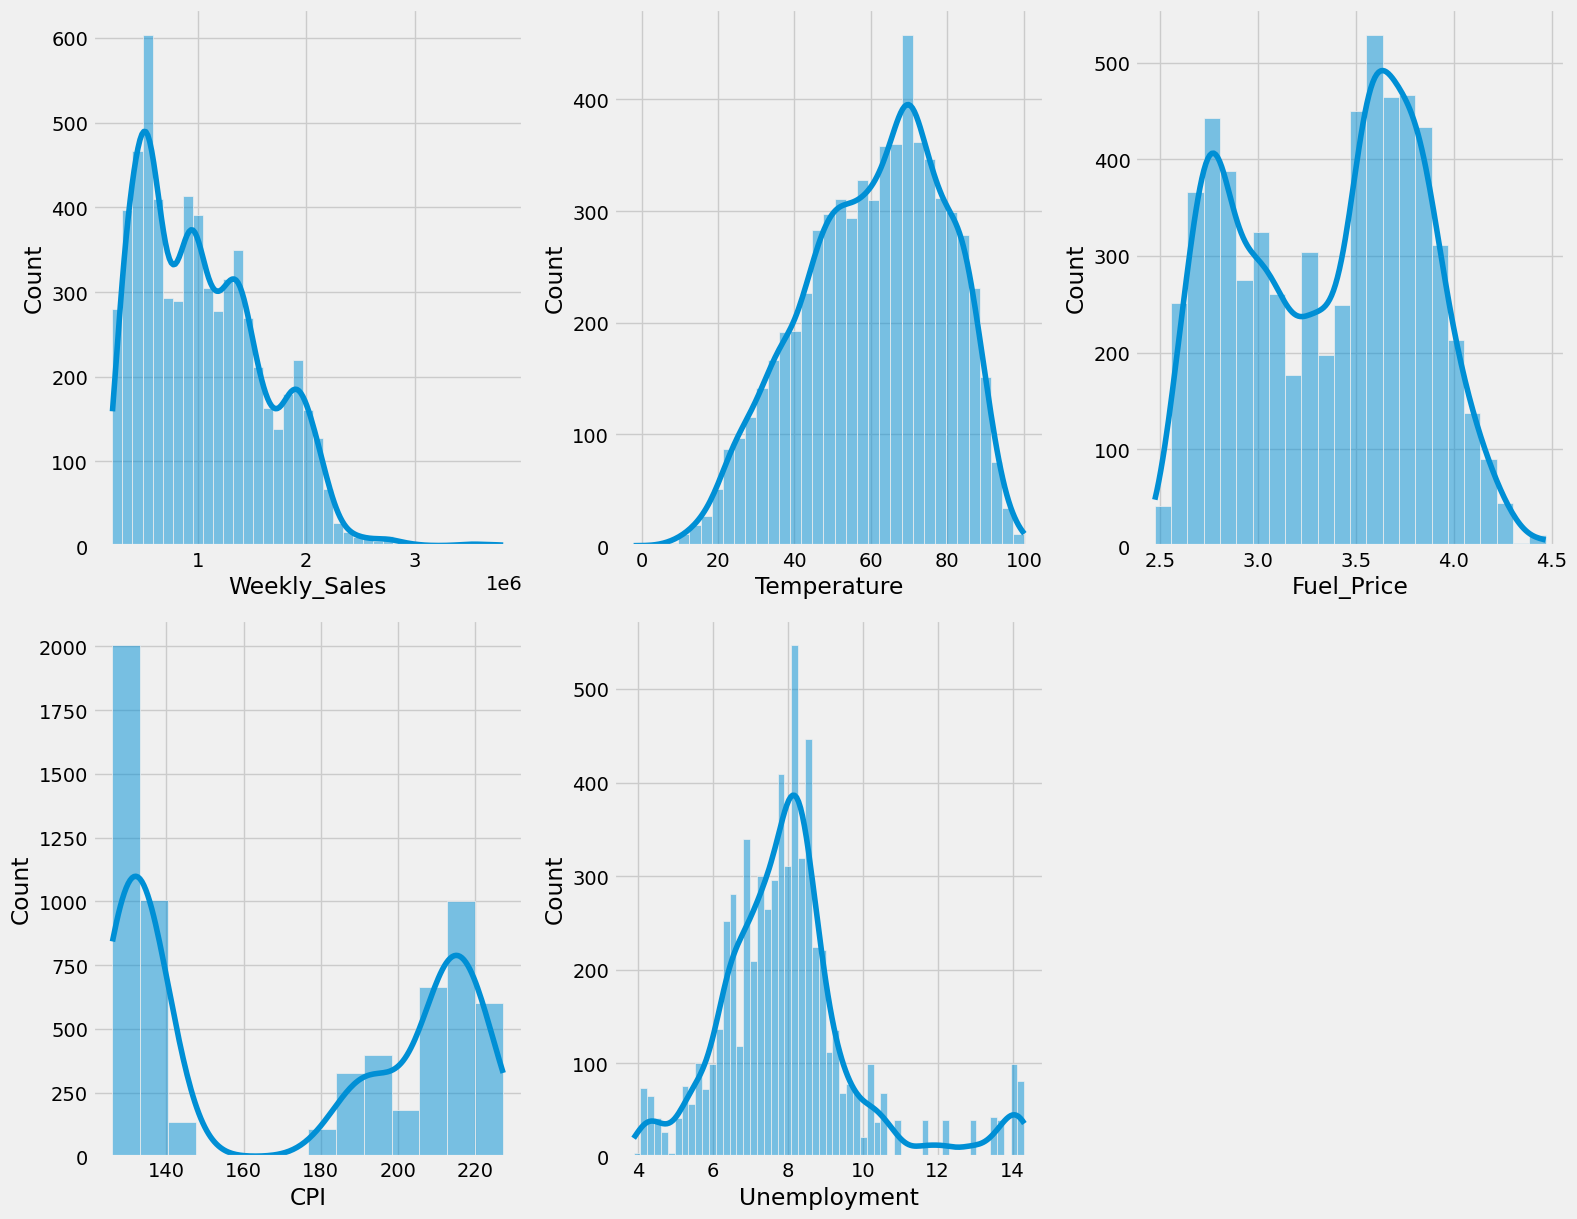

In [ ]:
# List of features
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Set the figure size
plt.figure(figsize=(16, 18))

# Loop through each column in your dataset
for i, col in enumerate(features):
    # Create subplots
    plt.subplot(3, 3, i+1)
    
    # Plot histogram for the current column
    sns.histplot(data=df, x=col, kde=True)

plt.tight_layout()
plt.show()

##### Visualizing correlation matrix of features
The correlation matrix helps us understand how different factors affect weekly sales. Sales slightly decrease when temperature, fuel price, and unemployment rise but increase a little when CPI goes up. Temperature has a small positive effect on fuel price, CPI, and unemployment. Fuel price has a weak negative impact on CPI and almost no effect on unemployment. CPI and unemployment have a stronger negative relationship, meaning when CPI rises, unemployment tends to drop. The matrix uses colors to show these patterns, with red indicating a positive link and blue showing a negative one.

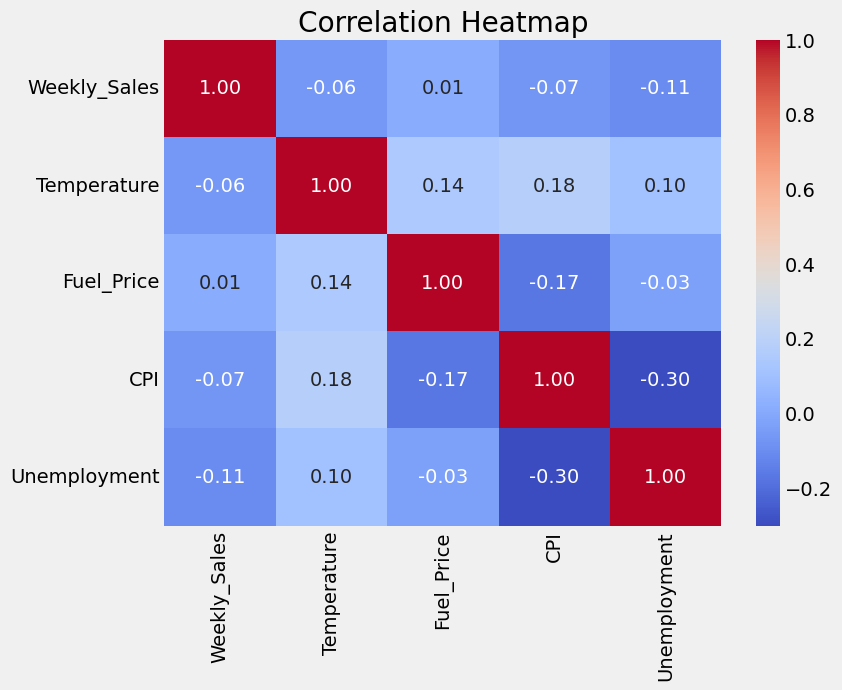

In [ ]:
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Temperature
Key observations for temperature show that most temperatures in the dataset fall between 60 and 75 degrees Fahrenheit (°F)., making this the most common range. The histogram bars show how often each temperature appears, while the smooth density line highlights the overall pattern. Extreme temperatures are rare, meaning the data is mostly centered around the average. This helps us see temperature trends and can be useful for further analysis.

<Axes: xlabel='Temperature', ylabel='Count'>

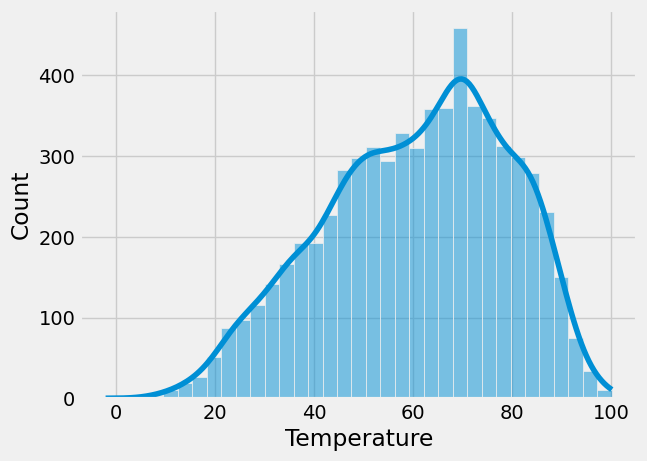

In [ ]:
sns.histplot(data=df,x='Temperature',kde=True)

##### Holiday Impact on Sales
Key observations for Holiday Impact on Sales from the graphs show that most records are for non-holidays, with 5,985 non-holiday entries (93.01%) and only 450 holiday entries (6.99%). The bar chart highlights the large gap between the two, while the pie chart visually confirms that holidays make up a small portion of the data. This suggests that holiday periods are rare compared to regular days.

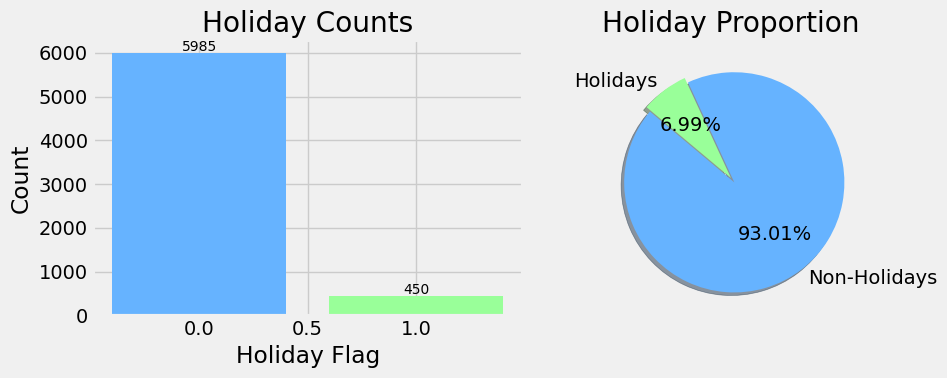

In [ ]:
data_sorted = data.sort_values(by='Holiday_Flag')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot
holiday_counts = data_sorted['Holiday_Flag'].value_counts()
ax[0].bar(holiday_counts.index, holiday_counts.values, color=['#66b3ff', '#99ff99'])

for i, value in enumerate(holiday_counts.values):
    ax[0].text(i, value + 50, str(value), ha='center', fontsize=10)  # Adjusted font size to 10

ax[0].set_title('Holiday Counts')
ax[0].set_xlabel('Holiday Flag')
ax[0].set_ylabel('Count')

#pie chart
labels = ['Non-Holidays', 'Holidays'] 
colors = ['#66b3ff', '#99ff99']
ax[1].pie(holiday_counts.values, labels=labels, autopct='%1.2f%%', startangle=140, 
          explode=(0.05, 0), colors=colors, shadow=True)
ax[1].set_title('Holiday Proportion')

plt.tight_layout()
plt.show()

##### Sales comparision: Holiday vs.Non-Holiday
Key observations for Holiday and Non-Holiday from the bar chart shows that most of Walmart's weekly sales come from regular shopping weeks, totaling over $6 billion, while holiday sales are much lower at $505 million. This large gap suggests that factors like reduced store hours, consumer spending habits, and promotions outside holiday seasons may play a role in the difference.

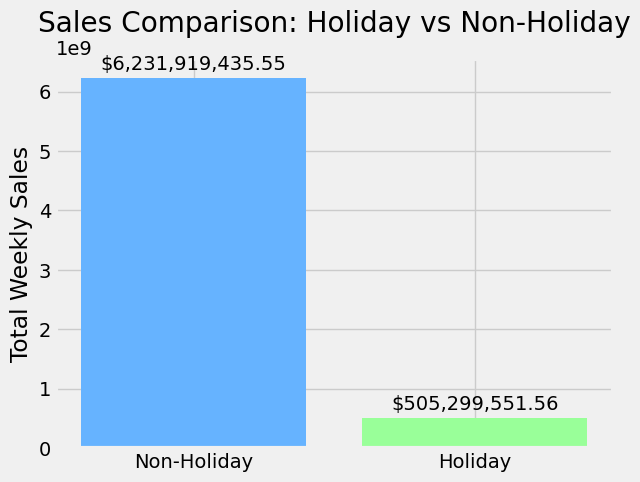

In [ ]:
sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

fig, ax = plt.subplots()
bars = ax.bar([0, 1], sales_by_holiday, color=['#66b3ff', '#99ff99'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'${height:,.2f}',  # Format the sales as a currency value
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset to avoid covering the bar
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Sales Comparison: Holiday vs Non-Holiday')
ax.set_ylabel('Total Weekly Sales')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Holiday', 'Holiday'])

plt.show()

##### Total weekly sales per year
Key observations for total weekly sales per year from the bar chart shows total weekly sales for 2010, 2011, and 2012. Sales were highest in 2011 at about $2.45 billion, slightly increasing from $2.29 billion in 2010. However, in 2012, sales dropped to $2.00 billion, showing a clear decline compared to the previous years. This suggests that after a peak in 2011, sales faced a downward trend in 2012.

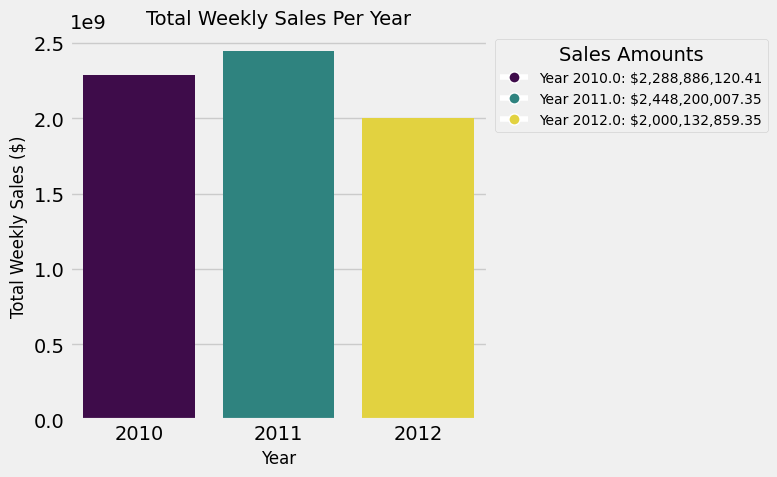

In [ ]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", dayfirst=True)

# Group by year and calculate total weekly sales
yearly_sales = df.groupby(df['Date'].dt.year)['Weekly_Sales'].sum().reset_index()
yearly_sales.columns = ['Year', 'Weekly_Sales']

# Plotting the total sales per year
plt.figure(figsize=(8, 5))  # Smaller figure size
bar_plot = sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, hue='Year', palette='viridis', dodge=False, legend=False)

plt.title('Total Weekly Sales Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Weekly Sales ($)', fontsize=12)

# Legend
legend_handles = []
for index, row in yearly_sales.iterrows():
    color = bar_plot.patches[index].get_facecolor() 
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                                     label=f'Year {row.Year}: ${row.Weekly_Sales:,.2f}', 
                                     markersize=8, markerfacecolor=color))

plt.legend(handles=legend_handles, title='Sales Amounts', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
plt.show()

##### Total Weekly Sales by Year and Season
Total weekly sales varied across seasons and years. In 2010, sales were steady in Fall, Spring, and Summer but dropped in Winter. In 2011, sales were more balanced, with Winter slightly higher and Spring the lowest. In 2012, Summer had the highest sales, followed by Spring, while Fall and Winter had the lowest sales.

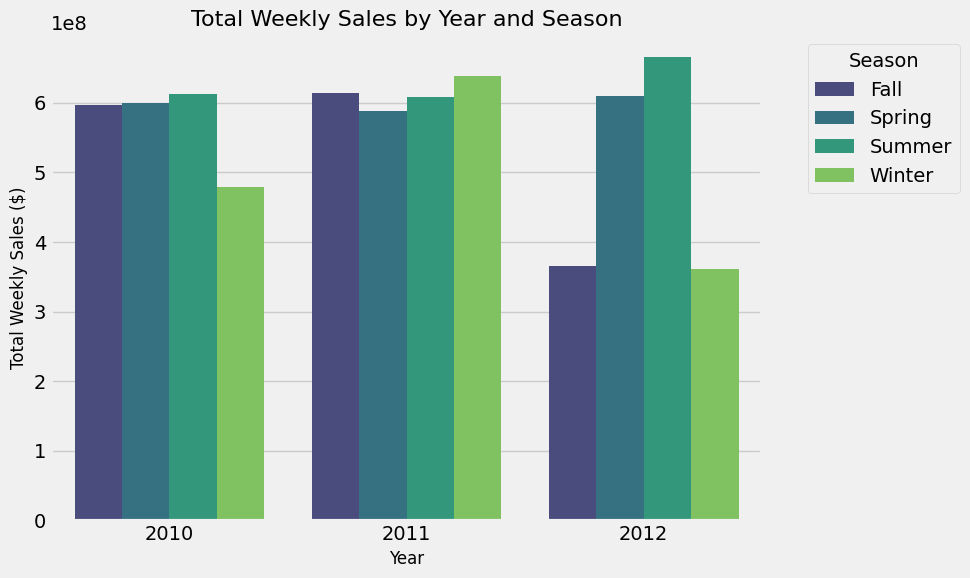

In [ ]:
# Sort the data by 'Date' and assign it to 'data_sorted'
data_sorted = data.sort_values(by='Date')

# Ensure 'Date' column is in datetime format
data_sorted['Date'] = pd.to_datetime(data_sorted['Date'], format="%d-%m-%Y", dayfirst=True)

# Extract 'Year' from 'Date' column
data_sorted['Year'] = data_sorted['Date'].dt.year

# Define a function to determine the season
def get_season(date):
	month = date.month
	if month in [12, 1, 2]:
		return 'Winter'
	elif month in [3, 4, 5]:
		return 'Spring'
	elif month in [6, 7, 8]:
		return 'Summer'
	else:
		return 'Fall'

# Apply the function to create the 'Season' column
data_sorted['Season'] = data_sorted['Date'].apply(get_season)

# Group by 'Year' and 'Season' and calculate total weekly sales
seasonal_sales = data_sorted.groupby(['Year', 'Season'])['Weekly_Sales'].sum().reset_index()

# Sort the data by year and season to ensure proper plotting
seasonal_sales = seasonal_sales.sort_values(by=['Year', 'Season'])

# Plot the total weekly sales by season
plt.figure(figsize=(10, 6))

# Barplot to visualize total weekly sales by year and season
sns.barplot(x='Year', y='Weekly_Sales', hue='Season', data=seasonal_sales, palette='viridis')

# Add title and labels
plt.title('Total Weekly Sales by Year and Season', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Weekly Sales ($)', fontsize=12)

# Display the legend outside the plot
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### Unemployment rate vs.Weekly sales
The scatter plot shows that as unemployment increases, weekly sales fall, indicating a negative correlation, meaning slight negative relationship between unemployment rate and weekly sales. The trend line confirms this downward pattern, suggesting that higher unemployment may lead to lower consumer spending. 

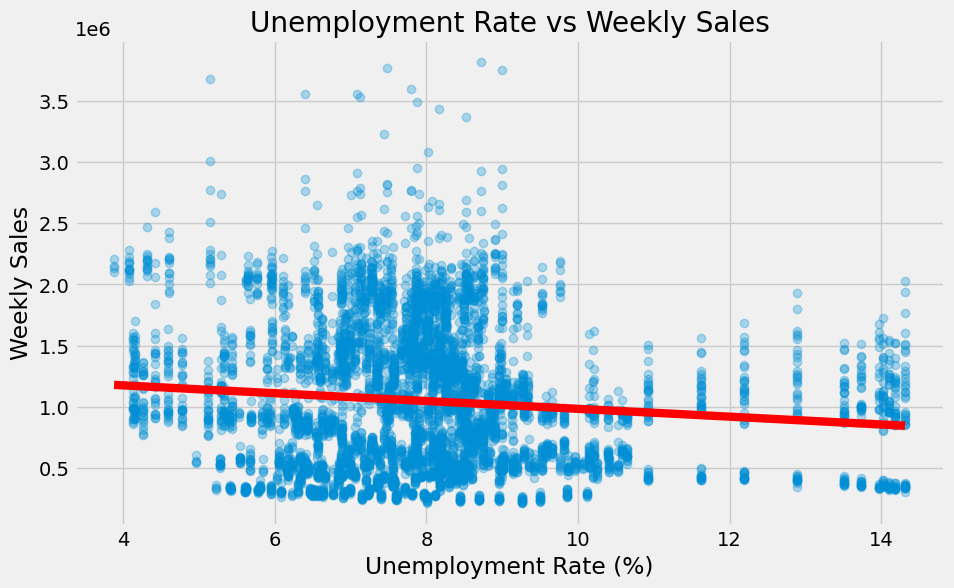

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=df, scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
plt.title('Unemployment Rate vs Weekly Sales')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales')
plt.show()

##### Impact of Holidays on Weekly Sales
The bar chart shows that average weekly sales are a bit higher during holiday weeks compared to non-holiday weeks. It uses the x-axis to indicate if it's a holiday week (1 for yes, 0 for no) and the y-axis to show average weekly sales in millions.

Conclusion: Holidays seem to boost weekly sales, probably because people spend more during these times. Businesses can use this information to plan their marketing and manage stock better.

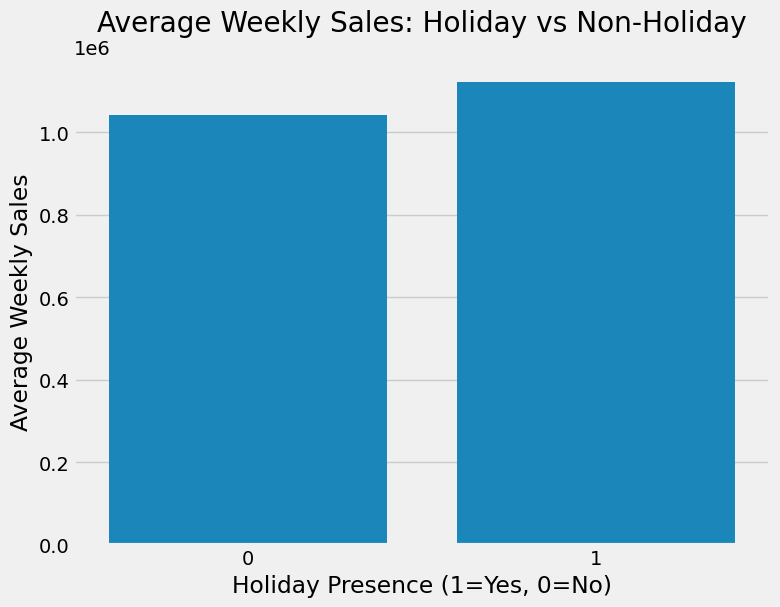

In [ ]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday Presence (1=Yes, 0=No)')
plt.ylabel('Average Weekly Sales')
plt.show()

##### Weekly Sales Performance Across 45 Stores
 Store 20 and Store 4 make around two million dollars, making them the best-performing stores. About 27 stores, or 60% of them, have sales below one million, showing much lower performance. These differences may be due to location, promotions, or the types of marketing, or special offers, customers each store attracts.

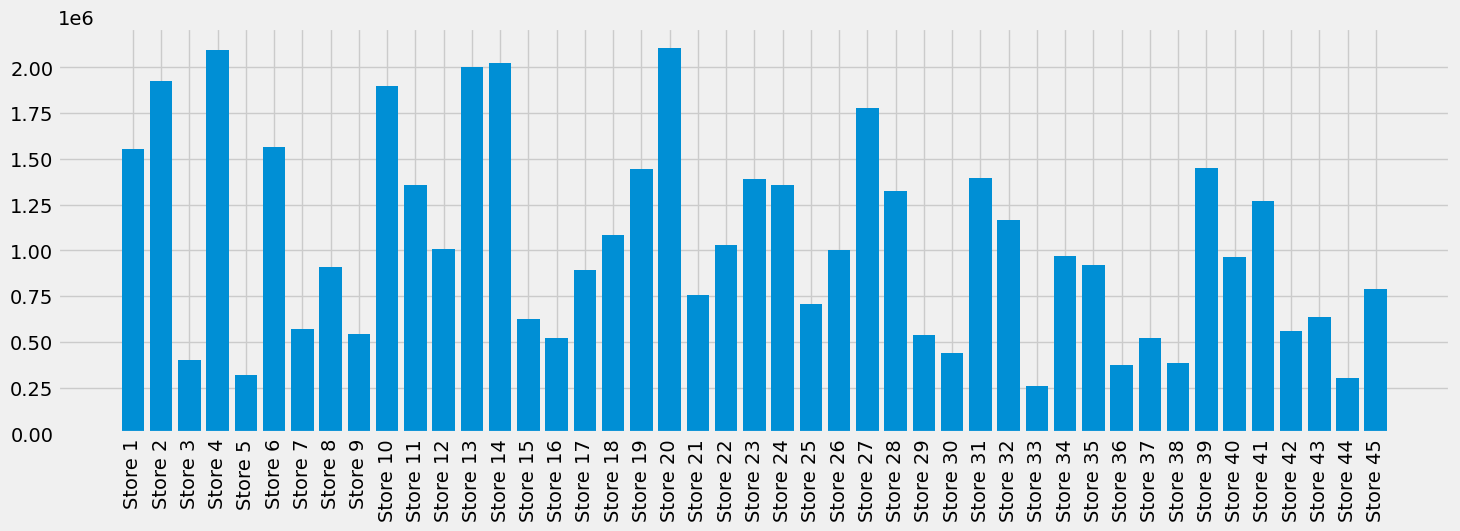

In [ ]:
# Calculate the mean of Weekly_Sales for each store
storemean = df.groupby('Store')['Weekly_Sales'].mean()

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,5))
plt.bar("Store "+storemean.index.astype('str'), storemean)
plt.xticks(rotation=90)
plt.show()

##### The Store Sales War
Store 20 has the highest sales, followed closely by stores 4, 14, and 13. A few stores make a lot of money, while many others have much lower sales. The stores on the right side of the chart have the lowest sales. This suggests that some stores perform much better than others, likely due to location, promotions, or customer demand.

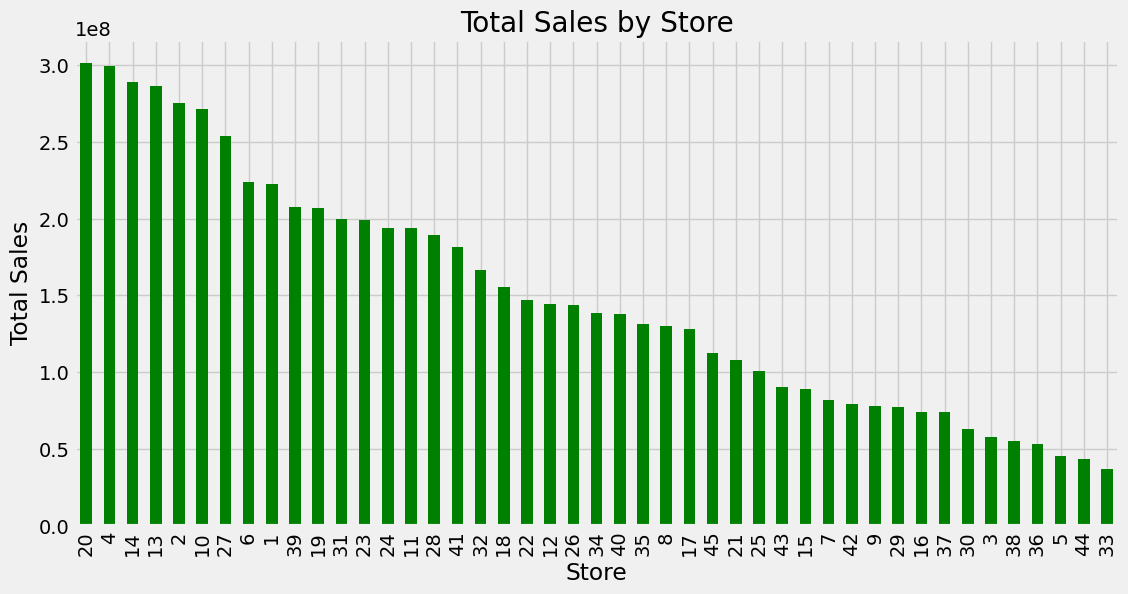

In [ ]:
# Aggregate sales by store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

##### Top Stores Crushing Sales
The top 10 stores with the highest weekly sales. Store 20 leads with about $301 million, followed closely by Store 4 at nearly $300 million. Other top performers, like Stores 14 and 13, also make around $280–290 million. The lowest in the top 10, Store 39, still sells over $200 million. These numbers show big differences in sales between stores, likely due to location, promotions, or customer demand.

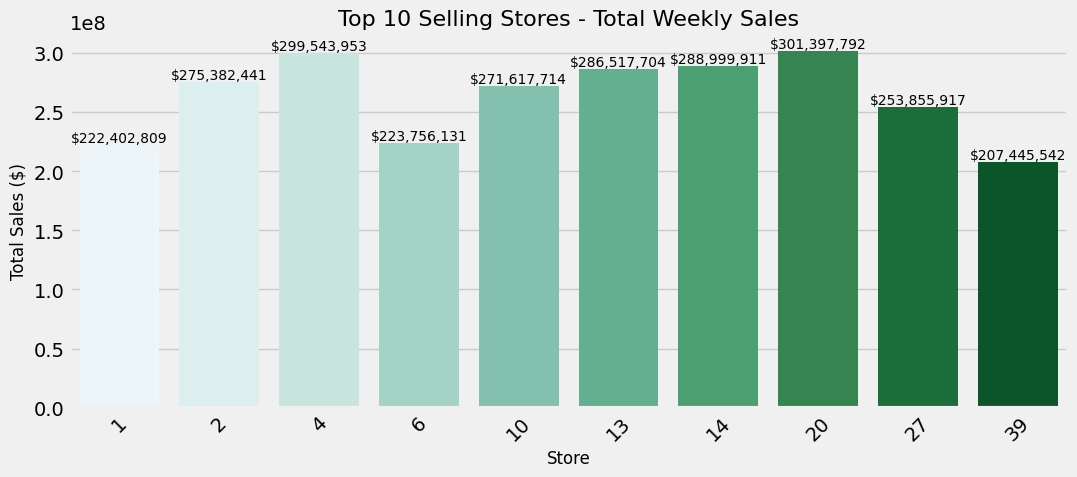

In [ ]:
# Group data by 'Store' and calculate the sum of 'Weekly_Sales'
store_sales = data_sorted.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total sales and get the top 10
top_10_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

plt.figure(figsize=(11, 5))
palette = sns.color_palette("BuGn", len(top_10_stores))
bar_plot = sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores, hue='Store', dodge=False, palette=palette, legend=False)

plt.title('Top 10 Selling Stores - Total Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.tight_layout()
plt.show()


##### Stores with the Lowest Sales
The 10 stores with the lowest weekly sales. Store 29 has the highest sales in this group at about $77 million, while Store 33 has the lowest at around $37 million. The other stores fall somewhere in between, with sales ranging from $43 million to $74 million. These stores are selling much less compared to the top-performing ones, possibly due to lower customer traffic, smaller store size, or fewer popular products.

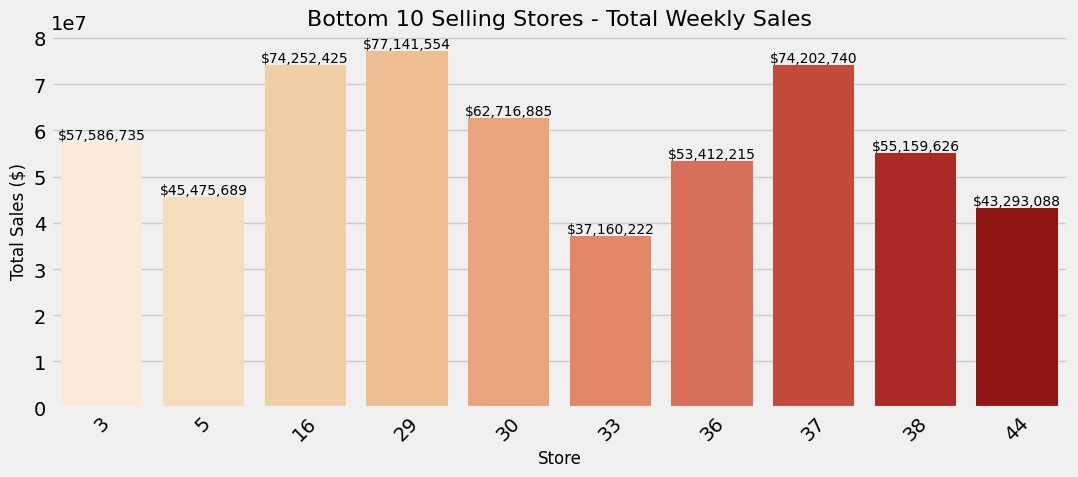

In [ ]:
# Group data by 'Store' and calculate the sum of 'Weekly_Sales'
store_sales = data_sorted.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total sales and get the bottom 10
bottom_10_stores = store_sales.sort_values(by='Weekly_Sales', ascending=True).head(10)

plt.figure(figsize=(11, 5))
palette = sns.color_palette("OrRd", len(bottom_10_stores))
bar_plot = sns.barplot(x='Store', y='Weekly_Sales', data=bottom_10_stores, hue='Store', dodge=False, palette=palette, legend=False)

plt.title('Bottom 10 Selling Stores - Total Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.tight_layout()
plt.show()
